In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df = df.drop(['petal length (cm)', 'petal width (cm)'], axis='columns')
df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


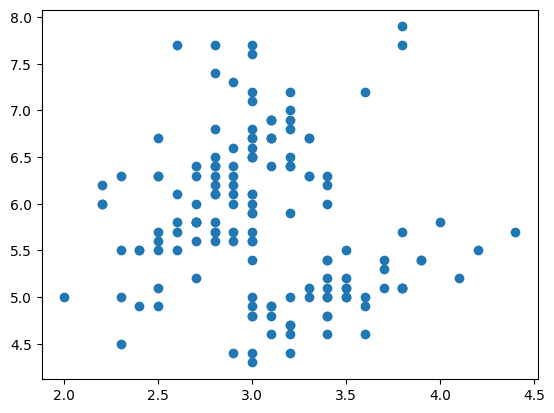

In [7]:
plt.scatter(df['sepal width (cm)'], df['sepal length (cm)'])

In [8]:
k_rng = range(1,15)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['sepal width (cm)', 'sepal length (cm)']])
    sse.append(km.inertia_)


Text(0, 0.5, 'SSE')

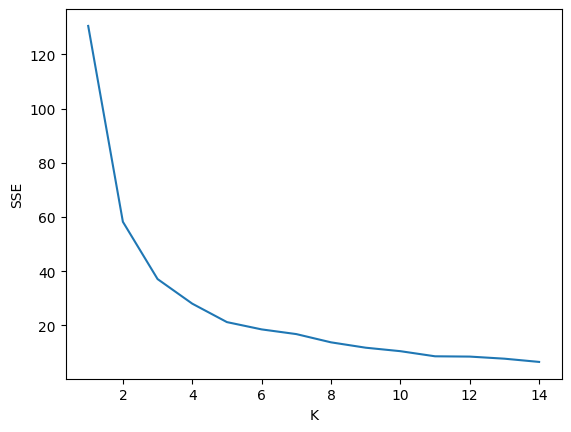

In [9]:
plt.plot(k_rng, sse)
plt.xlabel("K")
plt.ylabel("SSE")

In [11]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['sepal width (cm)', 'sepal length (cm)']])
y_predicted

array([0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0,
       0, 3, 0, 3, 0, 3, 2, 2, 2, 1, 2, 1, 2, 3, 2, 3, 3, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 2, 1, 2, 1, 2, 2, 3, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [12]:
df['cluster'] = y_predicted

df.head()

,sepal length (cm),sepal width (cm),cluster
0,5.1,3.5,0
1,4.9,3.0,3
2,4.7,3.2,3
3,4.6,3.1,3
4,5.0,3.6,0


In [13]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]
df3 = df[df.cluster == 3]

Text(0, 0.5, 'sepal length (cm)')

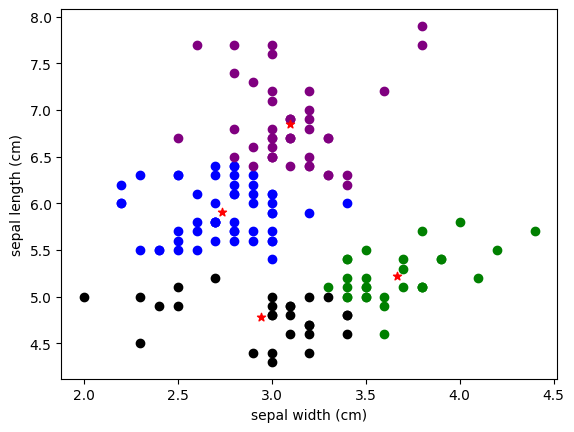

In [16]:
plt.scatter(df0['sepal width (cm)'], df0['sepal length (cm)'], color='green')
plt.scatter(df1['sepal width (cm)'], df1['sepal length (cm)'], color='blue')
plt.scatter(df2['sepal width (cm)'], df2['sepal length (cm)'], color='purple')
plt.scatter(df3['sepal width (cm)'], df3['sepal length (cm)'], color='black')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='red', marker='*')

plt.xlabel("sepal width (cm)")
plt.ylabel("sepal length (cm)")

In [17]:
ndf = df
ndf.head()

,sepal length (cm),sepal width (cm),cluster
0,5.1,3.5,0
1,4.9,3.0,3
2,4.7,3.2,3
3,4.6,3.1,3
4,5.0,3.6,0


In [18]:
scaler = MinMaxScaler()
scaler.fit(ndf[['sepal length (cm)']])
ndf['sepal length (cm)'] = scaler.transform(ndf[['sepal length (cm)']])
scaler.fit(ndf[['sepal width (cm)']])
ndf['sepal width (cm)'] = scaler.transform(ndf[['sepal width (cm)']])

ndf.head()

,sepal length (cm),sepal width (cm),cluster
0,0.222222,0.625000,0
1,0.166667,0.416667,3
2,0.111111,0.500000,3
3,0.083333,0.458333,3
4,0.194444,0.666667,0


In [19]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(ndf[['sepal width (cm)', 'sepal length (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 3, 3, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 4, 1, 1,
       3, 1, 3, 1, 3, 1, 2, 0, 2, 4, 0, 0, 0, 4, 0, 4, 4, 0, 4, 0, 0, 2,
       0, 0, 4, 4, 0, 0, 0, 0, 0, 2, 2, 2, 0, 4, 4, 4, 0, 0, 1, 0, 2, 4,
       0, 4, 4, 0, 4, 4, 4, 0, 0, 0, 4, 0, 0, 0, 2, 0, 0, 2, 4, 2, 0, 2,
       2, 0, 2, 4, 0, 0, 0, 2, 2, 4, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0], dtype=int32)

In [20]:
ndf['cluster'] = y_predicted
ndf.head()

,sepal length (cm),sepal width (cm),cluster
0,0.222222,0.625000,1
1,0.166667,0.416667,1
2,0.111111,0.500000,1
3,0.083333,0.458333,1
4,0.194444,0.666667,1


In [21]:
ndf0 = ndf[ndf.cluster == 0]
ndf1 = ndf[ndf.cluster == 1]
ndf2 = ndf[ndf.cluster == 2]
ndf3 = ndf[ndf.cluster == 3]
ndf4 = ndf[ndf.cluster == 4]

Text(0, 0.5, 'sepal length (cm)')

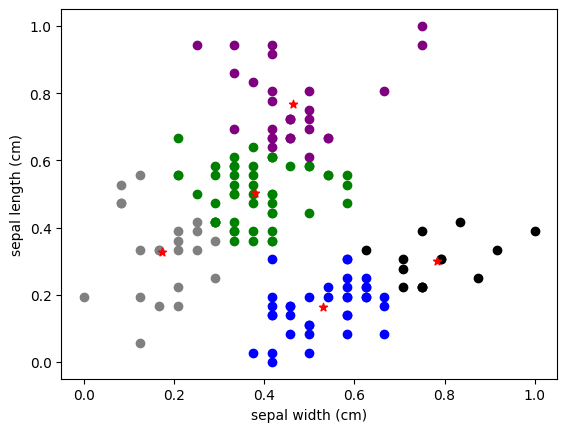

In [22]:
plt.scatter(ndf0['sepal width (cm)'], ndf0['sepal length (cm)'], color='green')
plt.scatter(ndf1['sepal width (cm)'], ndf1['sepal length (cm)'], color='blue')
plt.scatter(ndf2['sepal width (cm)'], ndf2['sepal length (cm)'], color='purple')
plt.scatter(ndf3['sepal width (cm)'], ndf3['sepal length (cm)'], color='black')
plt.scatter(ndf4['sepal width (cm)'], ndf4['sepal length (cm)'], color='gray')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='red', marker='*')

plt.xlabel("sepal width (cm)")
plt.ylabel("sepal length (cm)")